# ✈️ Airline Ticket Price Analysis

## Objective
This project analyzes airline ticket pricing to understand how factors such as
airline type, travel class, booking time, departure and arrival schedules,
and route characteristics influence ticket prices.
The goal is to identify meaningful pricing patterns and demand-driven behavior
through exploratory data analysis and visualization.

## Tools & Libraries Used
- **Pandas** – data cleaning, aggregation, and analysis
- **NumPy** – numerical computations
- **Matplotlib & Seaborn** – exploratory data visualization


# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Dataset Loading

The dataset is loaded to begin the analysis and understand
its structure and contents.


In [101]:
df = pd.read_csv(r"airlines_flights_data.csv")

In [104]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Data Cleaning

The dataset contains an unnecessary index column
which is removed to maintain cleanliness.


In [4]:
df.drop(columns = 'index', inplace=True)

## Data Structure and Quality Check

Understanding column types, checking for duplicates,
and identifying missing values.


In [105]:
df.info()
df.duplicated().sum()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

## Descriptive Statistics

Statistical summary of numerical features such as
price and duration.


In [9]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


## Outlier Analysis

Extreme values in duration and price are inspected
to understand unusual or premium flight cases.


In [10]:
df[df['duration']==49.830000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
193889,Air_India,AI-672,Chennai,Evening,two_or_more,Evening,Bangalore,Economy,49.83,2,23891
194359,Air_India,AI-672,Chennai,Evening,one,Evening,Bangalore,Economy,49.83,9,17538


## Exploratory Data Analysis (EDA)

The following questions are explored to understand
pricing behavior across different factors.


# Q1 ***How are flights distributed across different airlines, and which airlines dominate the market in terms of flight volume?***

The table below shows the exact number of flights operated by each airline,
which supports the visual comparison shown in the bar chart.

In [16]:
df['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

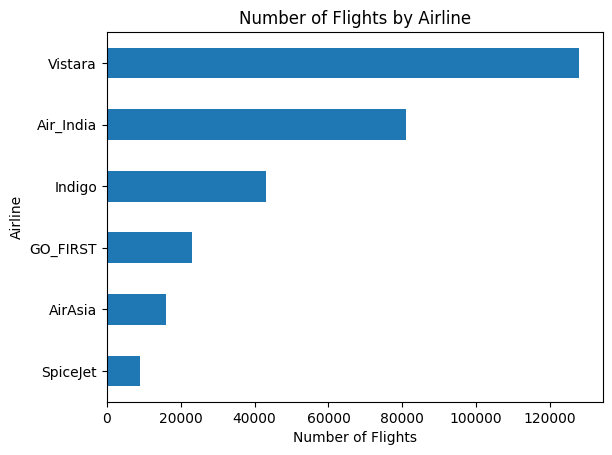

In [114]:
#showing all the airlines with their number of flights in`Horizontal Bar Graph`
df['airline'].value_counts(ascending=True).plot.barh()
plt.title('Number of Flights by Airline')
plt.xlabel('Number of Flights')
plt.ylabel('Airline')
plt.show()

**Insight:**  
The flight distribution is highly uneven across airlines.
Vistara and Air India dominate the dataset in terms of flight volume,
indicating stronger market presence and wider route coverage.
In contrast, airlines such as SpiceJet and AirAsia operate far fewer flights,
suggesting a smaller operational scale.


# Q2 ***How are flights distributed across different departure and arrival time periods?***

The tables below show the frequency of flights across different
departure and arrival time categories.


In [18]:
df['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [19]:
df['arrival_time'].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [115]:
time_order = [
    'Early_Morning',
    'Morning',
    'Afternoon',
    'Evening',
    'Night',
    'Late_Night'
]

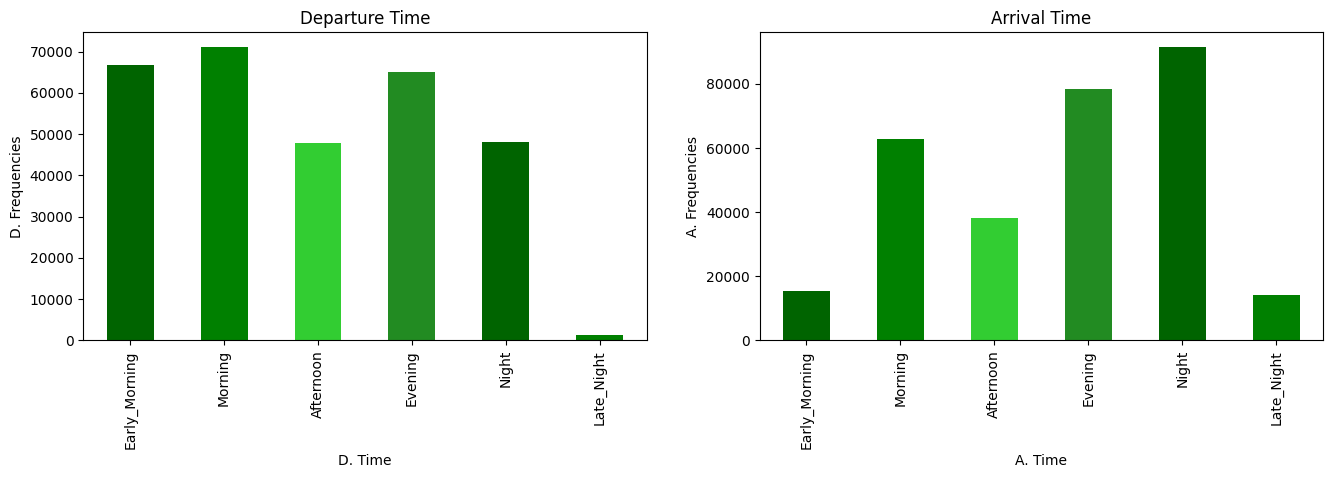

In [117]:
# Create one large figure for both plots
plt.figure(figsize=(16, 4))

# Subplot 1: Departure Time
plt.subplot(1, 2, 1)
df['departure_time'].value_counts().reindex(time_order).plot.bar(color=['darkgreen', 'green', 'limegreen','forestgreen'])
plt.title('Departure Time')
plt.xlabel('D. Time')
plt.ylabel('D. Frequencies')

# Subplot 2: Arrival Time
plt.subplot(1, 2, 2)
df['arrival_time'].value_counts().reindex(time_order).plot.bar(color=['darkgreen', 'green', 'limegreen','forestgreen'])
plt.title('Arrival Time')
plt.xlabel('A. Time')
plt.ylabel('A. Frequencies')

# Adjust layout and show
# plt.tight_layout()
plt.show()

**Insight:**  
Flights are most commonly scheduled during morning, evening, and night
time periods. Early morning and late-night flights are relatively fewer,
indicating lower demand or operational constraints. Arrival times show a
higher concentration at night, suggesting that many flights are scheduled
to land during late hours.


# Q3 ***Which cities serve as the major sources and destinations for flights?***

The tables below show the frequency of flights originating from
and arriving at different cities.


In [21]:
df['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [22]:
df['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

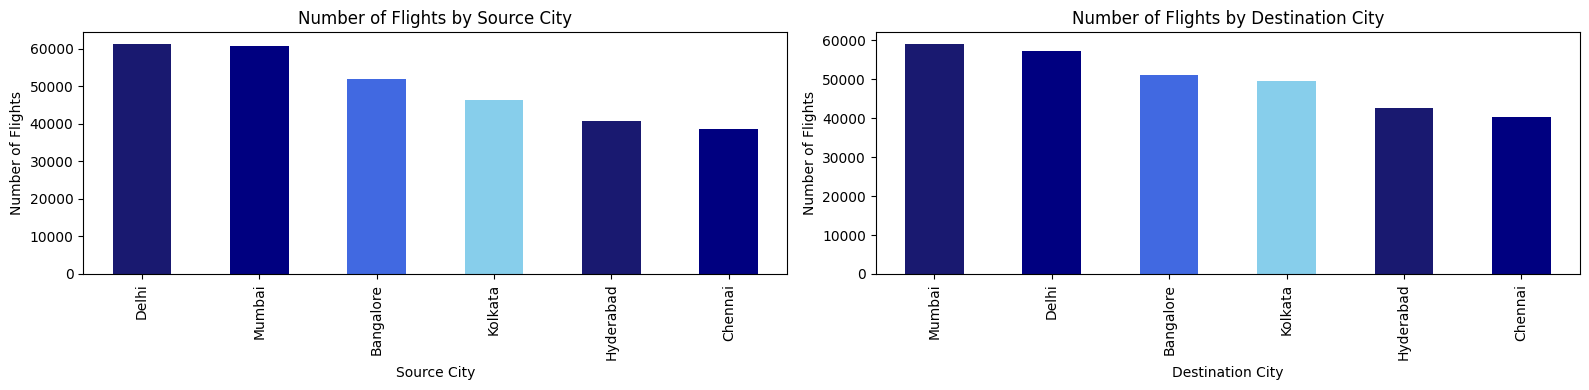

In [118]:
#Create one large figure for both plots source city & destination city for the flights with their counts
plt.figure(figsize=(16,4))

# Subplot 1: Source City
plt.subplot(1,2,1)
df['source_city'].value_counts().plot.bar(color=['midnightblue', 'navy', 'royalblue', 'skyblue'])
plt.title('Number of Flights by Source City')
plt.xlabel('Source City')
plt.ylabel('Number of Flights')

#Subplot 2: Destination City
plt.subplot(1,2,2)
df['destination_city'].value_counts().plot.bar(color = ['midnightblue', 'navy', 'royalblue', 'skyblue'])
plt.title('Number of Flights by Destination City')
plt.xlabel('Destination City')
plt.ylabel('Number of Flights')

plt.tight_layout()
plt.show()


**Insight:**  
Delhi and Mumbai emerge as the primary hubs for air travel,
serving as both major source and destination cities.
Other metropolitan cities such as Bangalore, Kolkata, and Hyderabad
also show high traffic, indicating strong inter-city connectivity
among major urban centers.


# Q4 ***Does ticket price vary across airlines and travel class?***

In [124]:
order = (
    df[df['class'] == 'Economy']
    .groupby('airline')['price']
    .mean()
    .sort_values()
    .index
)

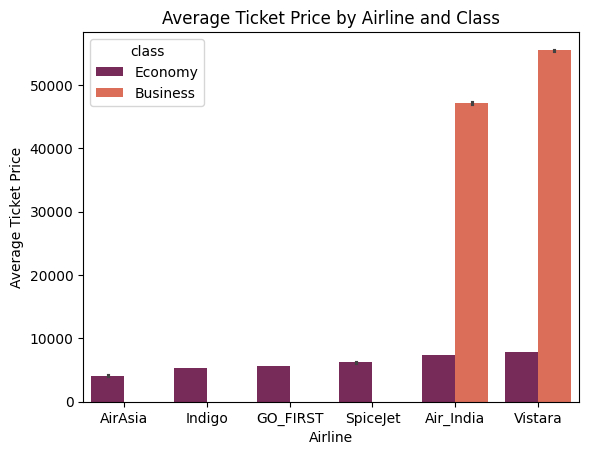

In [121]:
sns.barplot(x = 'airline', y = 'price', palette = 'rocket', data = df, order = order,  hue = 'class')
plt.title("Average Ticket Price by Airline and Class")
plt.xlabel("Airline")
plt.ylabel("Average Ticket Price")
plt.show()

**Insight:**  
Ticket prices vary significantly across airlines, with Business class fares
consistently higher than Economy class for all carriers.
Vistara and Air India show substantially higher Business class prices,
suggesting premium service positioning, while low-cost carriers such as
AirAsia and GO_FIRST maintain comparatively lower average fares.


# Q5 ***How does ticket price vary across different departure and arrival time periods?***

To understand how ticket prices vary across different time periods,
the average ticket price is calculated for each departure and arrival
time category. This helps identify time-based pricing patterns.


In [37]:
df.groupby('departure_time')['price'].mean()

departure_time
Afternoon        18179.203331
Early_Morning    20370.676718
Evening          21232.361894
Late_Night        9295.299387
Morning          21630.760254
Night            23062.146808
Name: price, dtype: float64

In [38]:
df.groupby('arrival_time')['price'].mean()

arrival_time
Afternoon        18494.598993
Early_Morning    14993.139521
Evening          23044.371615
Late_Night       11284.906078
Morning          22231.076098
Night            21586.758341
Name: price, dtype: float64

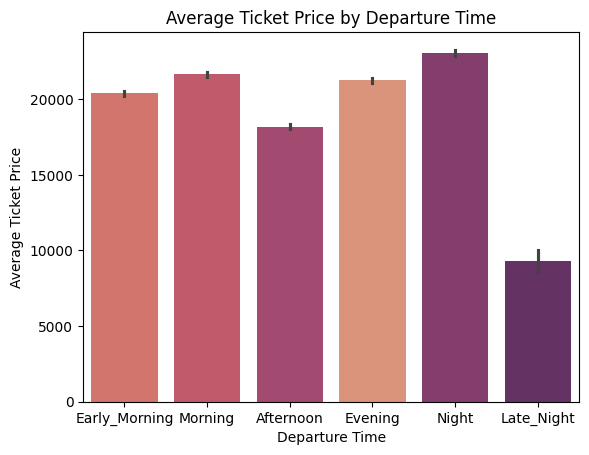

In [136]:
sns.barplot(x = 'departure_time',
            y = 'price',
            palette = 'flare',
            data = df,
            hue = 'departure_time',
            order = time_order,
            legend = False,
            )

plt.title("Average Ticket Price by Departure Time")
plt.xlabel("Departure Time")
plt.ylabel("Average Ticket Price")
plt.show()

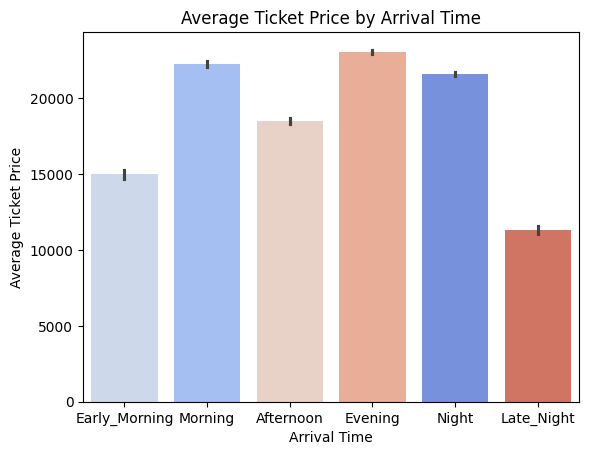

In [137]:
sns.barplot(x = 'arrival_time',
            y = 'price',
            palette = 'coolwarm',
            hue = 'arrival_time',
            data = df,
            order = time_order,
            legend = False,
            )

plt.title("Average Ticket Price by Arrival Time")
plt.xlabel("Arrival Time")
plt.ylabel("Average Ticket Price")
plt.show()

**Insight:**  
Ticket prices vary across different time periods.
Flights departing or arriving during night and evening hours tend to have
higher average prices, indicating higher demand or preferred travel times.
Late-night flights are significantly cheaper, likely due to lower passenger
demand and operational constraints.


# Q6 ***How does the average ticket price vary across different source and destination cities?***

In [68]:
df.groupby('source_city')['price'].mean()

source_city
Bangalore    21469.460575
Chennai      21995.339871
Delhi        18951.326639
Hyderabad    20155.623879
Kolkata      21746.235679
Mumbai       21483.818839
Name: price, dtype: float64

In [69]:
df.groupby('destination_city')['price'].mean()

destination_city
Bangalore    21593.955784
Chennai      21953.323969
Delhi        18436.767870
Hyderabad    20427.661284
Kolkata      21959.557556
Mumbai       21372.529469
Name: price, dtype: float64

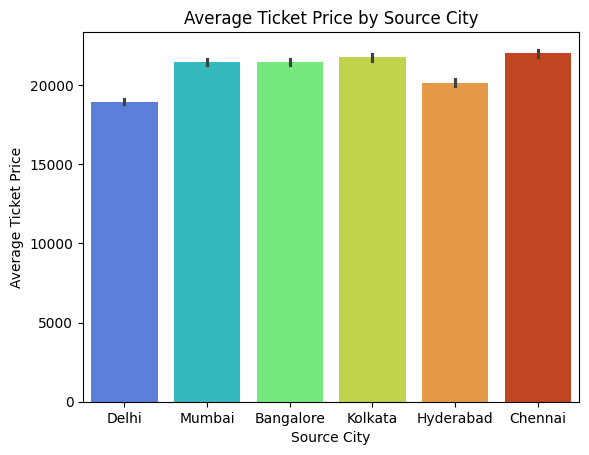

In [140]:
sns.barplot(
    x='source_city',
    y='price',
    palette = 'turbo',
    hue = 'source_city',
    data=df
)
plt.title("Average Ticket Price by Source City")
plt.xlabel("Source City")
plt.ylabel("Average Ticket Price")
plt.show()


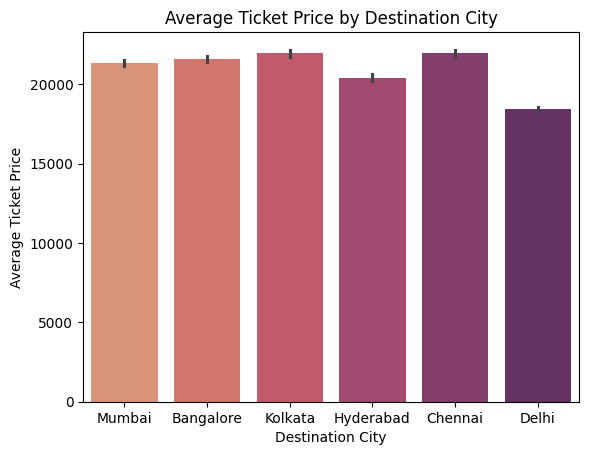

In [145]:
sns.barplot(
    x='destination_city',
    y='price',
    palette = 'flare',
    hue = 'destination_city',
    data=df
)
plt.title("Average Ticket Price by Destination City")
plt.xlabel("Destination City")
plt.ylabel("Average Ticket Price")
plt.show()


**Insight:**  
Average ticket prices vary across both source and destination cities.
Flights originating from or arriving at major metropolitan hubs such as
Delhi, Mumbai, and Bangalore tend to have higher average prices,
suggesting stronger demand and higher traffic on these routes.


# Q7 ***How does ticket price change when tickets are booked 1–2 days before departure?***

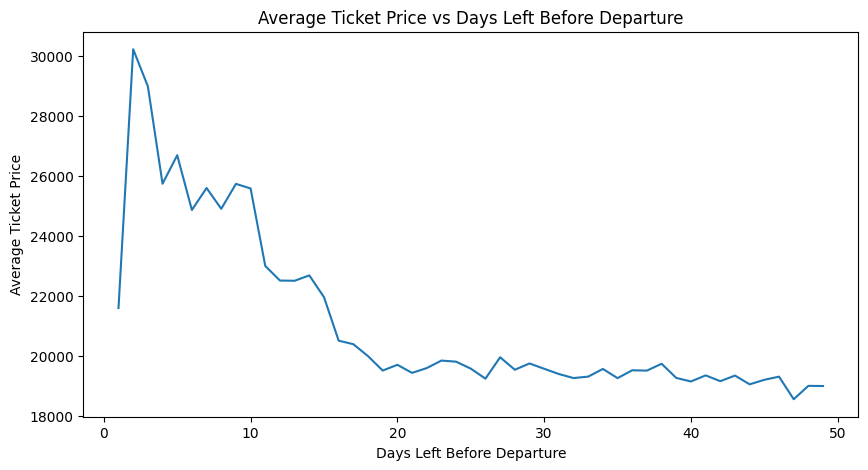

In [146]:
price_by_days = df.groupby('days_left')['price'].mean()

plt.figure(figsize=(10, 5))
plt.plot(price_by_days.index, price_by_days.values)
plt.title("Average Ticket Price vs Days Left Before Departure")
plt.xlabel("Days Left Before Departure")
plt.ylabel("Average Ticket Price")
plt.show()


**Insight:**  
Ticket prices are significantly higher when bookings are made very close
to the departure date, particularly within 1–2 days before departure.
As the number of days left increases, average ticket prices generally
decline, highlighting the impact of dynamic pricing and last-minute demand.


# Q8 ***How does ticket price differ between Economy and Business class?***

In [147]:
df.groupby('class')['price'].mean()

class
Business    52540.081124
Economy      6572.342383
Name: price, dtype: float64

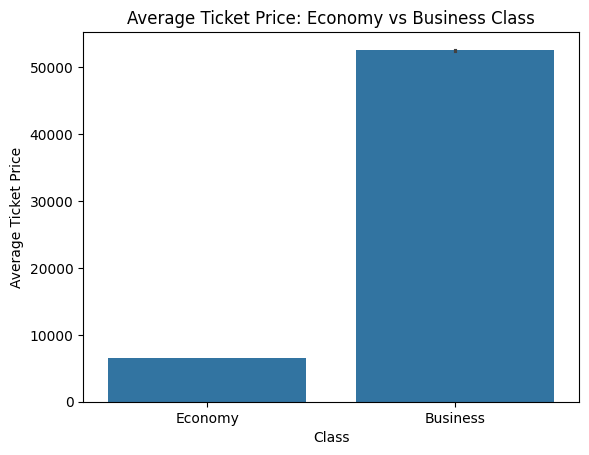

In [148]:
sns.barplot(
    x='class',
    y='price',
    data=df
)

plt.title("Average Ticket Price: Economy vs Business Class")
plt.xlabel("Class")
plt.ylabel("Average Ticket Price")
plt.show()


**Insight:**  
Business class tickets are significantly more expensive than Economy class
tickets. This substantial price difference highlights service-level
segmentation in airline pricing, where premium services are offered at
much higher fares compared to standard economy travel.


# Q9 ***How does the average Business class ticket price vary across major airline routes?***

In [152]:
business_routes = (
    df[df['class'] == 'Business']
    .groupby(['airline', 'source_city', 'destination_city'])['price']
    .mean()
    .reset_index()
)


In [153]:
top_routes = business_routes.sort_values('price', ascending=False).head(10)
top_routes


,airline,source_city,destination_city,price
43,Vistara,Delhi,Kolkata,63469.766341
54,Vistara,Kolkata,Mumbai,62888.326139
59,Vistara,Mumbai,Kolkata,62525.265255
52,Vistara,Kolkata,Delhi,62403.943267
34,Vistara,Bangalore,Mumbai,61452.101869
55,Vistara,Mumbai,Bangalore,61209.568541
39,Vistara,Chennai,Mumbai,61109.317047
33,Vistara,Bangalore,Kolkata,60025.829430
56,Vistara,Mumbai,Chennai,59872.629017
50,Vistara,Kolkata,Bangalore,59685.605388


In [154]:
top_routes['route'] = (
    top_routes['source_city'] + " → " + top_routes['destination_city']
)


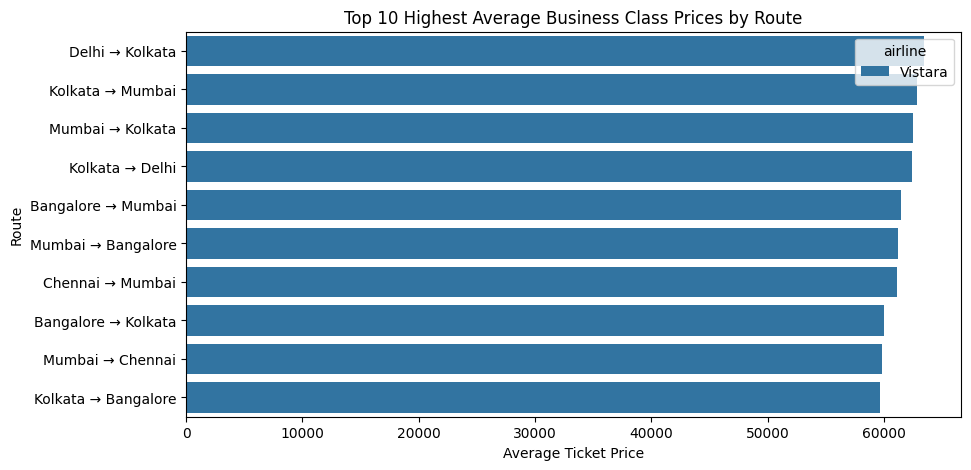

In [155]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x='price',
    y='route',
    hue='airline',
    data=top_routes
)
plt.title("Top 10 Highest Average Business Class Prices by Route")
plt.xlabel("Average Ticket Price")
plt.ylabel("Route")
plt.show()


**Insight:**  
Average Business class ticket prices vary significantly across airline routes.
High-demand routes between major metropolitan cities show the highest prices,
particularly when operated by premium airlines. This highlights the impact of
route demand and airline positioning on Business class pricing strategies.


## Conclusion

This exploratory data analysis reveals clear patterns in airline ticket pricing
driven by service level, timing, and route characteristics.

Ticket prices vary significantly across airlines, with premium carriers
consistently charging higher fares, particularly in Business class.
A strong price gap between Economy and Business class highlights clear
service-level segmentation in airline pricing strategies.

Time-related factors also play a crucial role in pricing.
Flights departing or arriving during peak periods such as evening and night
tend to be more expensive, while late-night flights are generally cheaper.
Additionally, ticket prices increase sharply as the departure date approaches,
demonstrating the impact of dynamic and last-minute pricing.

City- and route-level analysis shows that major metropolitan hubs such as
Delhi, Mumbai, Bangalore, and Hyderabad experience higher average fares,
especially on high-demand Business class routes.
This indicates that both demand concentration and airline positioning
strongly influence route-specific pricing.

Overall, the analysis demonstrates that airline ticket pricing is shaped by
multiple interacting factors, including airline type, travel class, timing,
booking window, and route demand.
These insights can support data-driven decision-making in pricing strategy,
travel planning, and market analysis.
